# 연습
1. csv폴더 안에 num_1 폴더에 있는 chipotle.tsv 로드
2. order_id 컬럼의 데이터의 타입을 str 변경 (이유는? 통계요약정보 describe()숫자형의 데이터만 계산)
3. 가장 많이 주문한 item_name 출력
4. item당 주문 총량의 top10을 바 그래프 표시
5. item_price의 '$'를 제거하고 데이터 타입을 float의 형태로 변경
6. 주문당 평균 계산 금액 출력

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../csv/num_1/chipotle.tsv", sep='\t')

In [3]:
# order_id를 str의 형태로 변경
df['order_id'] = df['order_id'].astype(str)

In [4]:
# 가장 많이 주문한 아이템의 이름 출력
# group_data = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False) # 밑처럼 quantity에 []한번더 하면 시리즈에서 데이터 프레임형태로 바뀜
# 위같은 시리즈형태에서 sort_value 할때는 지정안해줘도 되지만 밑에처럼 데이터 프레임형태에서는 지정해줘야됨
group_data = df.groupby('item_name')[['quantity']].sum().sort_values('quantity', ascending=False)
group_data.index[0]

'Chicken Bowl'

<Axes: xlabel='item_name'>

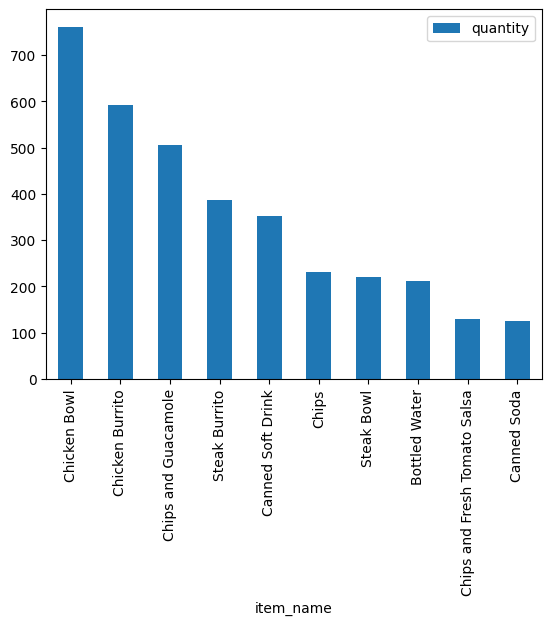

In [5]:
# 주문당 주문총량 top10 그래프로 시각화표시(바그래프)
# case1
group_data.head(10).plot.bar()

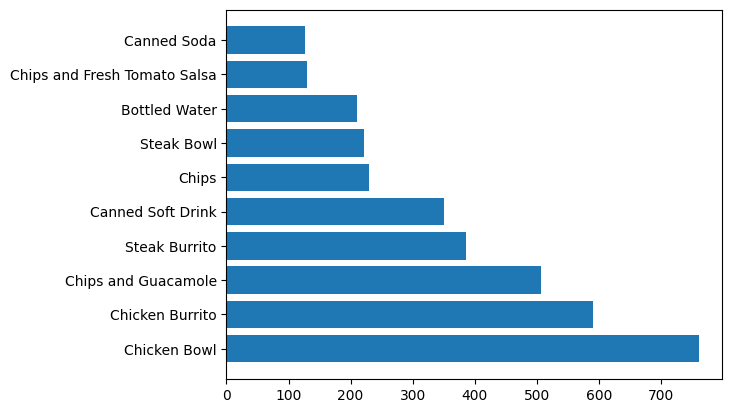

In [6]:
# case2
x = group_data.head(10).index
y = group_data.head(10)['quantity']
plt.barh(x, y)
plt.show()

In [ ]:
df.head(1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [8]:
# item_price의 '$'를 제거한다 = 위에 4에 object를 float의 형태로 변경
# case 1
df['item_price'].str.replace('$', "")

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [9]:
# case 2
df['item_price'].str.lstrip('$')

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [10]:
# case 3 
def change(x):
    # x의 데이터의 타입은? 문자
    x = x.replace("$","") # or x.lstrip("$")
    return x

df['item_price'].apply(change)

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [11]:
# case 4
df['item_price'] = df['item_price'].apply(lambda y:y.replace("$", "")) # 맥함수 제일 많이 사용 특히 여러개일때 편함

In [12]:
df['item_price'] = df['item_price'].astype('float')

In [13]:
df.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [14]:
(df['quantity'] >= 2)

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619    False
4620    False
4621    False
Name: quantity, Length: 4622, dtype: bool

In [15]:
# chicken bowl 이 메뉴를 2개 이상 주문한 고객들이 주문한 chicken bowl의 평균 주문 수량
# df['quantity] >=2 , df['item_name'] == chicken bowl 둘다 참이여야함 (행의 조건)

df.loc[(df['quantity'] >= 2) & (df['item_name'] == 'Chicken Bowl')]['quantity'].mean()

2.0606060606060606